# 🛒 E-Commerce Sales Analysis (Portfolio Project)

## 1. Introduction
In this project, I analyze sales data from an e-commerce store to uncover business insights and provide recommendations.  
The analysis follows the data analysis process: **Ask → Prepare → Process → Analyze → Share → Act**.

---

## 2. Import Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")


## 3. Load Data


In [6]:
# Load dataset (adjust path if needed)
df = pd.read_csv("../data/superstore.csv", encoding="latin1")

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 4. Data Cleaning
- Remove duplicates
- Handle missing values
- Convert data types
- Standardize categories


In [7]:
df.drop_duplicates(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Category'] = df['Category'].str.title()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## 5. Exploratory Data Analysis (EDA)

### 5.1 Sales by Region


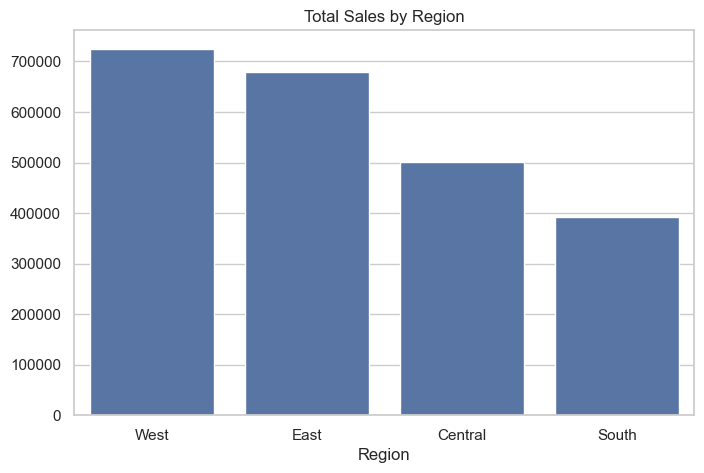

In [8]:
sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=sales_region.index, y=sales_region.values)
plt.title("Total Sales by Region")
plt.show()


**Insight:**  
The West region has the highest sales, while the South lags behind.  

**Recommendation:**  
Consider targeted promotions in the South to boost sales.


### 5.2 Top 10 Profitable Products


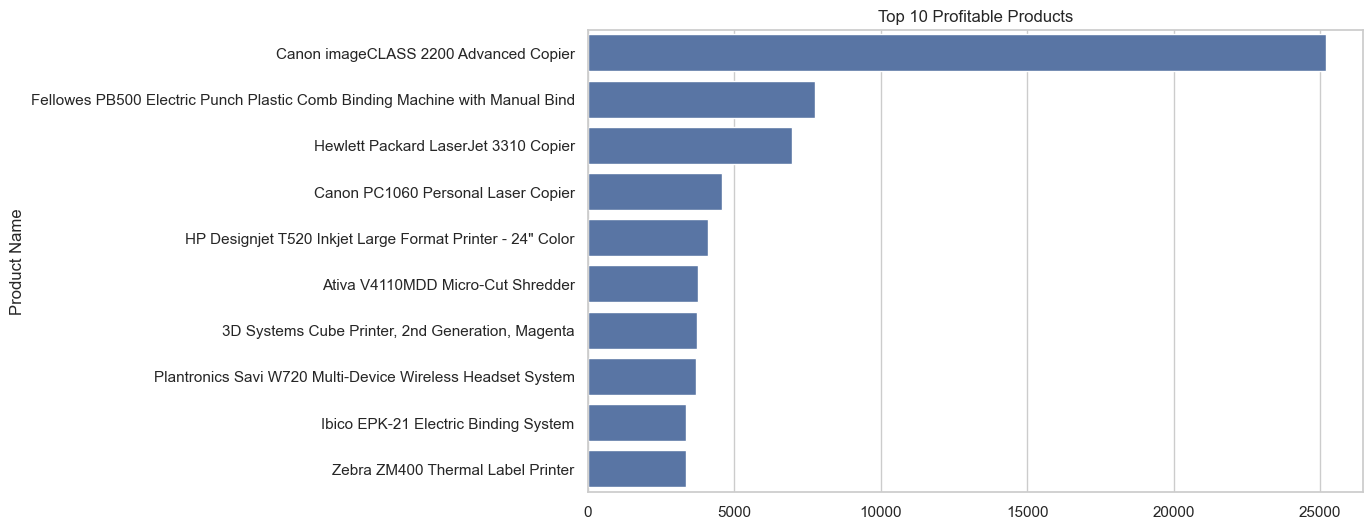

In [9]:
top_products = df.groupby('Product Name')['Profit'].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Profitable Products")
plt.show()


**Insight:**  
A small group of products contributes heavily to profit.  

**Recommendation:**  
Prioritize marketing and stock availability for these top products.


### 5.3 Monthly Sales Trend


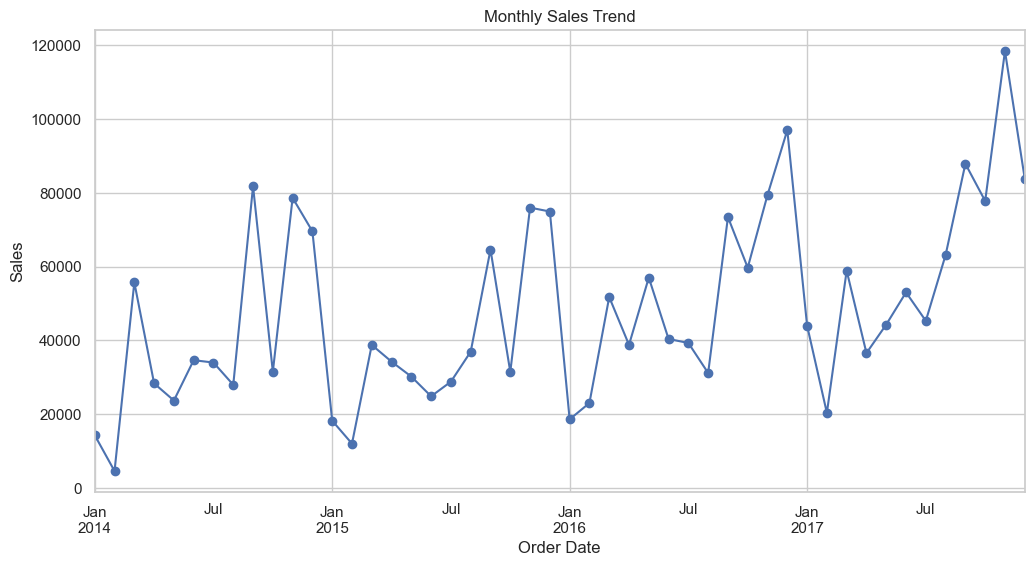

In [10]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(12,6), title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


**Insight:**  
Sales consistently spike in December, suggesting seasonal demand.  

**Recommendation:**  
Ensure adequate inventory and staffing ahead of the holiday season.


## 6. Conclusion
**Key Insights:**  
1. West region dominates sales but has lower profit margins.  
2. Top 10 products contribute a large share of total profit.  
3. Strong seasonal trend with December peak.  

**Business Recommendations:**  
- Adjust discounting/pricing strategy in West region.  
- Focus promotions on high-profit products.  
- Prepare supply chain for end-of-year surge.  
